<H1 style="text-align:center;">
Finding Explanations
</H1>
<hr style="height:5px;">

## Decision tree
<hr style="height:2px;">

R also allows for much finer control of the decision tree construction. The script
below demonstrates how to create a simple tree for the Iris data set using a training
set of 100 records. Then the tree is displayed, and a confusion matrix for the test
set—the remaining 50 records of the Iris data set—is printed. The libraries `rpart`,
which comes along with the standard installation of R, and `rattle`, that needs to
be installed, are required:

In [1]:
library(rpart)
iris.train <- c(sample(1:150,50))
iris.dtree <- rpart(Species~.,data=iris,subset=iris.train)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



            
             setosa versicolor virginica
  setosa         35          0         0
  versicolor      0         27         1
  virginica       0          6        31

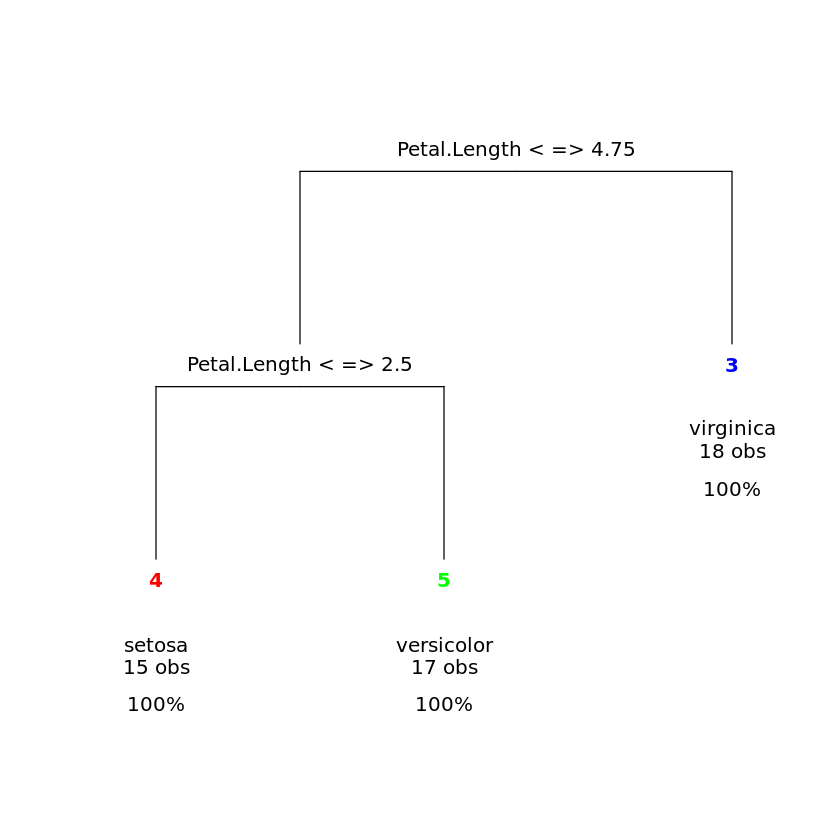

In [2]:
library(rattle)
drawTreeNodes(iris.dtree)
table(predict(iris.dtree,iris[-iris.train,],type="class"),
      iris[-iris.train,"Species"])

In addition to many options related to tree construction, R also offers many ways
to beautify the graphical representation. We refer to R manuals for more details.

## Naive Bayes Classifiers
<hr style="height:2px;">

Naive Bayes classifiers use normal distributions by default for numerical attributes.
The package `e1071` must be installed first:

In [3]:
library(e1071)
iris.train <- c(sample(1:150,75))
iris.nbayes <- naiveBayes(Species~.,data=iris,subset=iris.train)
table(predict(iris.nbayes,iris[-iris.train,],type="class"),
      iris[-iris.train,"Species"])

            
             setosa versicolor virginica
  setosa         28          0         0
  versicolor      0         22         1
  virginica       0          2        22

As in the example of the decision tree, the Iris data set is split into a training and
a test data set, and the confusion matrix is printed. The parameters for the normal
distributions of the classes can be obtained in the following way:

In [4]:
print(iris.nbayes)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    setosa versicolor  virginica 
 0.2933333  0.3466667  0.3600000 

Conditional probabilities:
            Sepal.Length
Y                [,1]      [,2]
  setosa     4.972727 0.3781935
  versicolor 6.034615 0.5059188
  virginica  6.555556 0.5401804

            Sepal.Width
Y                [,1]      [,2]
  setosa     3.422727 0.4264268
  versicolor 2.807692 0.2682135
  virginica  2.937037 0.3236191

            Petal.Length
Y                [,1]      [,2]
  setosa     1.413636 0.1457181
  versicolor 4.315385 0.4333057
  virginica  5.514815 0.4888792

            Petal.Width
Y                 [,1]       [,2]
  setosa     0.2409091 0.09081164
  versicolor 1.3307692 0.18279875
  virginica  2.0185185 0.30386869



If Laplace correction should be applied for categorical attribute, this can be
achieved by setting the parameter `laplace` to the desired value when calling the
function `naiveBayes`.

## Regression
<hr style="height:2px;">

Least squares linear regression is implemented by the function `lm` (linear model).
As an example, we construct a linear regression function to predict the petal width
of the Iris data set based on the other numerical attributes:

In [5]:
iris.lm <- lm(iris$Petal.Width ~ iris$Sepal.Length
              + iris$Sepal.Width + iris$Petal.Length)
summary(iris.lm)


Call:
lm(formula = iris$Petal.Width ~ iris$Sepal.Length + iris$Sepal.Width + 
    iris$Petal.Length)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60959 -0.10134 -0.01089  0.09825  0.60685 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.24031    0.17837  -1.347     0.18    
iris$Sepal.Length -0.20727    0.04751  -4.363 2.41e-05 ***
iris$Sepal.Width   0.22283    0.04894   4.553 1.10e-05 ***
iris$Petal.Length  0.52408    0.02449  21.399  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.192 on 146 degrees of freedom
Multiple R-squared:  0.9379,	Adjusted R-squared:  0.9366 
F-statistic: 734.4 on 3 and 146 DF,  p-value: < 2.2e-16


The `summary` provides the necessary information about the regression result, including
the coefficient of the regression function.

If we want to use a polynomial as the regression function, we need to protect the
evaluation of the corresponding power by the function `I` inhibiting interpretation.
As an example, we compute a regression function to predict the petal width based
on a quadratic function in the petal length:

In [6]:
iris.lm <- lm(iris$Petal.Width ~ iris$Petal.Length +
              I(iris$Petal.Length^2))
summary(iris.lm)


Call:
lm(formula = iris$Petal.Width ~ iris$Petal.Length + I(iris$Petal.Length^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56213 -0.12392 -0.01555  0.13547  0.64105 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.386781   0.079883  -4.842 3.22e-06 ***
iris$Petal.Length       0.433833   0.053652   8.086 2.10e-13 ***
I(iris$Petal.Length^2) -0.002569   0.007501  -0.342    0.732    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2071 on 147 degrees of freedom
Multiple R-squared:  0.9272,	Adjusted R-squared:  0.9262 
F-statistic: 935.7 on 2 and 147 DF,  p-value: < 2.2e-16


Robust regression requires the library `MASS`, which needs installation. Otherwise
it is handled in the same way as least squares regression, using the function `rlm`
instead of `lm`:

In [7]:
library(MASS)
iris.rlm <- rlm(iris$Petal.Width ~ iris$Sepal.Length
                + iris$Sepal.Width + iris$Petal.Length)
summary(iris.rlm)


Call: rlm(formula = iris$Petal.Width ~ iris$Sepal.Length + iris$Sepal.Width + 
    iris$Petal.Length)
Residuals:
      Min        1Q    Median        3Q       Max 
-0.606532 -0.099003 -0.009158  0.101636  0.609940 

Coefficients:
                  Value   Std. Error t value
(Intercept)       -0.2375  0.1771    -1.3412
iris$Sepal.Length -0.2062  0.0472    -4.3713
iris$Sepal.Width   0.2201  0.0486     4.5297
iris$Petal.Length  0.5231  0.0243    21.5126

Residual standard error: 0.1492 on 146 degrees of freedom

The default method is based on Huber’s error function. If Tukey’s biweight should
be used, the parameter `method` should be changed in the following way:

In [8]:
# ridge regression with Tukey's biweight
iris.rlm <- rlm(iris$Petal.Width ~ iris$Sepal.Length
                + iris$Sepal.Width + iris$Petal.Length,
                method="MM")
summary(iris.rlm)


Call: rlm(formula = iris$Petal.Width ~ iris$Sepal.Length + iris$Sepal.Width + 
    iris$Petal.Length, method = "MM")
Residuals:
     Min       1Q   Median       3Q      Max 
-0.60608 -0.09975 -0.01030  0.10375  0.61963 

Coefficients:
                  Value   Std. Error t value
(Intercept)       -0.1896  0.1718    -1.1036
iris$Sepal.Length -0.2152  0.0457    -4.7036
iris$Sepal.Width   0.2181  0.0471     4.6276
iris$Petal.Length  0.5252  0.0236    22.2689

Residual standard error: 0.1672 on 146 degrees of freedom

A plot of the computed weights can be obtained by the following command:

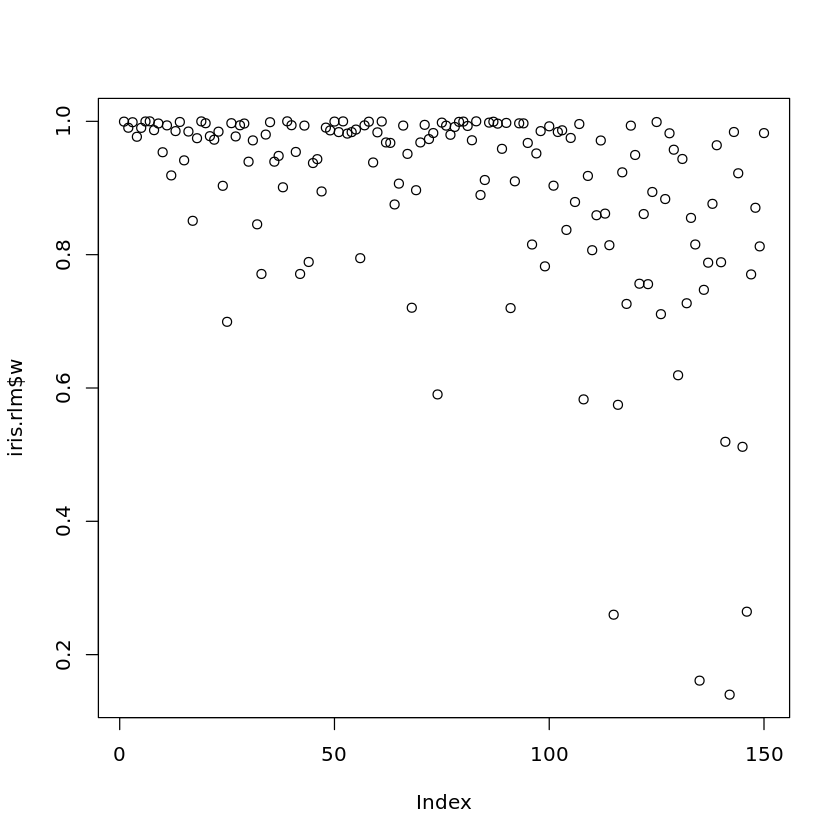

In [9]:
plot(iris.rlm$w)